In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 数据预处理

In [235]:
# 1.1 读取数据集
file_path = f"BankChurners.csv"
data = pd.read_csv(file_path)
# 1.2 缺失值查询
data.info()
# 1.3 去除无效特征
data = data[data.columns[1:-2]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [159]:
# 1.4 数据集格式转换
# 用户流失==0 用户存有==1
Attrition_Flag = list(set(list(data['Attrition_Flag'])))
num_attrited = len(data[data['Attrition_Flag'] == 'Attrited Customer'])
num_existing = len(data[data['Attrition_Flag'] == 'Existing Customer'])
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 0, 'Existing Customer': 1})
# 女性==0 男性==1
Gender = list(set(list(data['Gender'])))
num_F = len(data[data['Gender'] == 'F'])
num_M = len(data[data['Gender'] == 'M'])
data['Gender'] = data['Gender'].replace({'F': 0, 'M': 1})
# Unknown==1 Uneducated==2 High_School==3 College==4 Graduate==5 Post_Graduate==6 Doctorate==7
Education_Level = list(set(list(data['Education_Level'])))
num_Unknown = len(data[data['Education_Level'] == 'Unknown'])
num_Uneducated = len(data[data['Education_Level'] == 'Uneducated'])
num_High_School = len(data[data['Education_Level'] == 'High School'])
num_College = len(data[data['Education_Level'] == 'College'])
num_Graduate = len(data[data['Education_Level'] == 'Graduate'])
num_Post_Graduate = len(data[data['Education_Level'] == 'Post-Graduate'])
num_Doctorate = len(data[data['Education_Level'] == 'Doctorate'])
data['Education_Level'] = data['Education_Level'].replace({'Unknown': 1, 'Uneducated': 2, 'High School': 3, 'College': 4,
                                                         'Graduate': 5, 'Post-Graduate': 6, 'Doctorate': 7})
# 婚姻未知==0 单身==1 离婚==2 结婚==3
Marital_Status = list(set(list(data['Marital_Status'])))
num_Unknown = len(data[data['Marital_Status'] == 'Unknown'])
num_Single = len(data[data['Marital_Status'] == 'Single'])
num_Divorced = len(data[data['Marital_Status'] == 'Divorced'])
num_Married = len(data[data['Marital_Status'] == 'Married'])
data['Marital_Status'] = data['Marital_Status'].replace({'Unknown': 0, 'Single': 1, 'Divorced': 2, 'Married': 3})
# ’Unknown’==1 ’Less than $40K’==2 ’$40K - $60K’==3 ’$60K - $80K’==4 ’$80K - $120K’==5 ’$120K +’==6
Income_Category = list(set(list(data['Income_Category'])))
num_Unknown = len(data[data['Income_Category'] == 'Unknown'])
num_less40k = len(data[data['Income_Category'] == 'Less than $40K'])
num_40kto60k = len(data[data['Income_Category'] == '$40K - $60K'])
num_60kto80k = len(data[data['Income_Category'] == '$60K - $80K'])
num_80kto120k = len(data[data['Income_Category'] == '$80K - $120K'])
num_over120k = len(data[data['Income_Category'] == '$120K +'])
data['Income_Category'] = data['Income_Category'].replace({'Unknown': 1, 'Less than $40K': 2, '$40K - $60K': 3,
                                                           '$60K - $80K': 4, '$80K - $120K': 5, '$120K +': 6})
# Blue==1 Silver==2 Gold==3 Platinum==4
Card_Category = list(set(list(data['Card_Category'])))
num_Blue = len(data[data['Card_Category'] == 'Blue'])
num_Silver = len(data[data['Card_Category'] == 'Silver'])
num_Gold = len(data[data['Card_Category'] == 'Gold'])
num_Platinum = len(data[data['Card_Category'] == 'Platinum'])
data['Card_Category'] = data['Card_Category'].replace({'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4})
# data.info()

## 2 探索性分析及可视化

/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


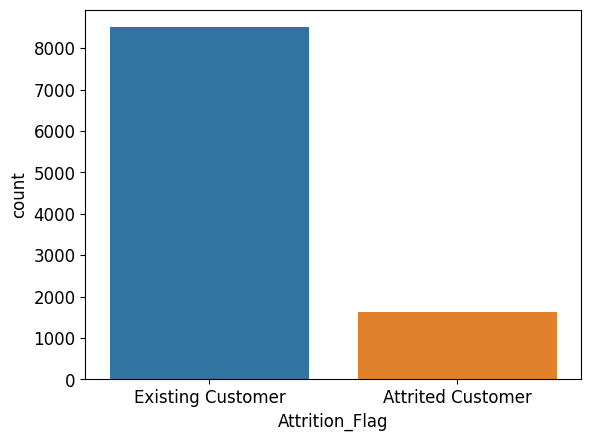

/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


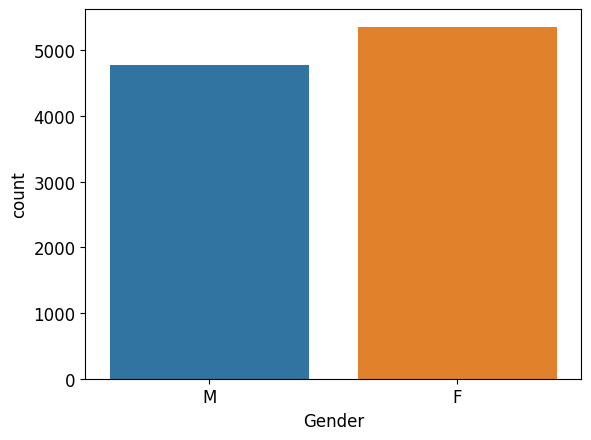

In [160]:
import seaborn as sns
# 还原数据集
file_path = f"BankChurners.csv"
data0 = pd.read_csv(file_path)
# Attrition_Flag
sns.countplot(x='Attrition_Flag', data=data0)
plt.xlabel('Attrition_Flag')
plt.show()
# Gender
sns.countplot(x='Gender', data=data0)
plt.xlabel('Gender')
plt.show()

/var/folders/rn/sf89g39d3fl515d_nxjlz5jw0000gn/T/ipykernel_91212/1044832489.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Customer_Age'])
/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

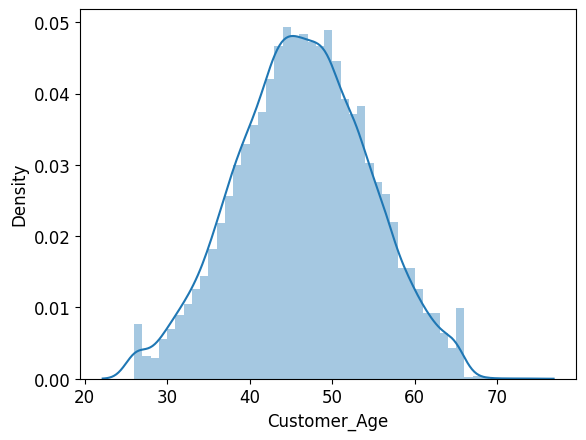

In [161]:
# 年龄分布
sns.distplot(data['Customer_Age'])
plt.show()

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## 3 特征归一化

In [163]:
from sklearn.preprocessing import MinMaxScaler
# 创建一个MinMaxScaler对象
scaler = MinMaxScaler()
# 对每一列进行特征归一化
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# 打印归一化后的数据
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,0.404255,1.0,0.6,0.333333,1.000000,0.6,0.000000,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,1.0,0.489362,0.0,1.0,0.666667,0.333333,0.2,0.000000,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,1.0,0.531915,1.0,0.6,0.666667,1.000000,0.8,0.000000,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
3,1.0,0.297872,0.0,0.8,0.333333,0.000000,0.2,0.000000,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761
4,1.0,0.297872,1.0,0.6,0.166667,1.000000,0.6,0.000000,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1.0,0.510638,1.0,0.4,0.666667,0.333333,0.4,0.000000,0.627907,0.4,0.333333,0.500000,0.077536,0.735399,0.062266,0.206947,0.832647,0.829457,0.230749,0.462462
10123,0.0,0.319149,1.0,0.4,0.000000,0.666667,0.4,0.000000,0.279070,0.6,0.333333,0.500000,0.085819,0.868494,0.060499,0.236679,0.459219,0.457364,0.183899,0.511512
10124,0.0,0.382979,0.0,0.2,0.333333,1.000000,0.2,0.000000,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.156637,0.241095,0.544175,0.387597,0.220248,0.000000
10125,0.0,0.085106,1.0,0.4,0.666667,0.000000,0.4,0.000000,0.534884,0.6,0.500000,0.500000,0.116172,0.000000,0.152928,0.157492,0.438689,0.403101,0.194400,0.000000


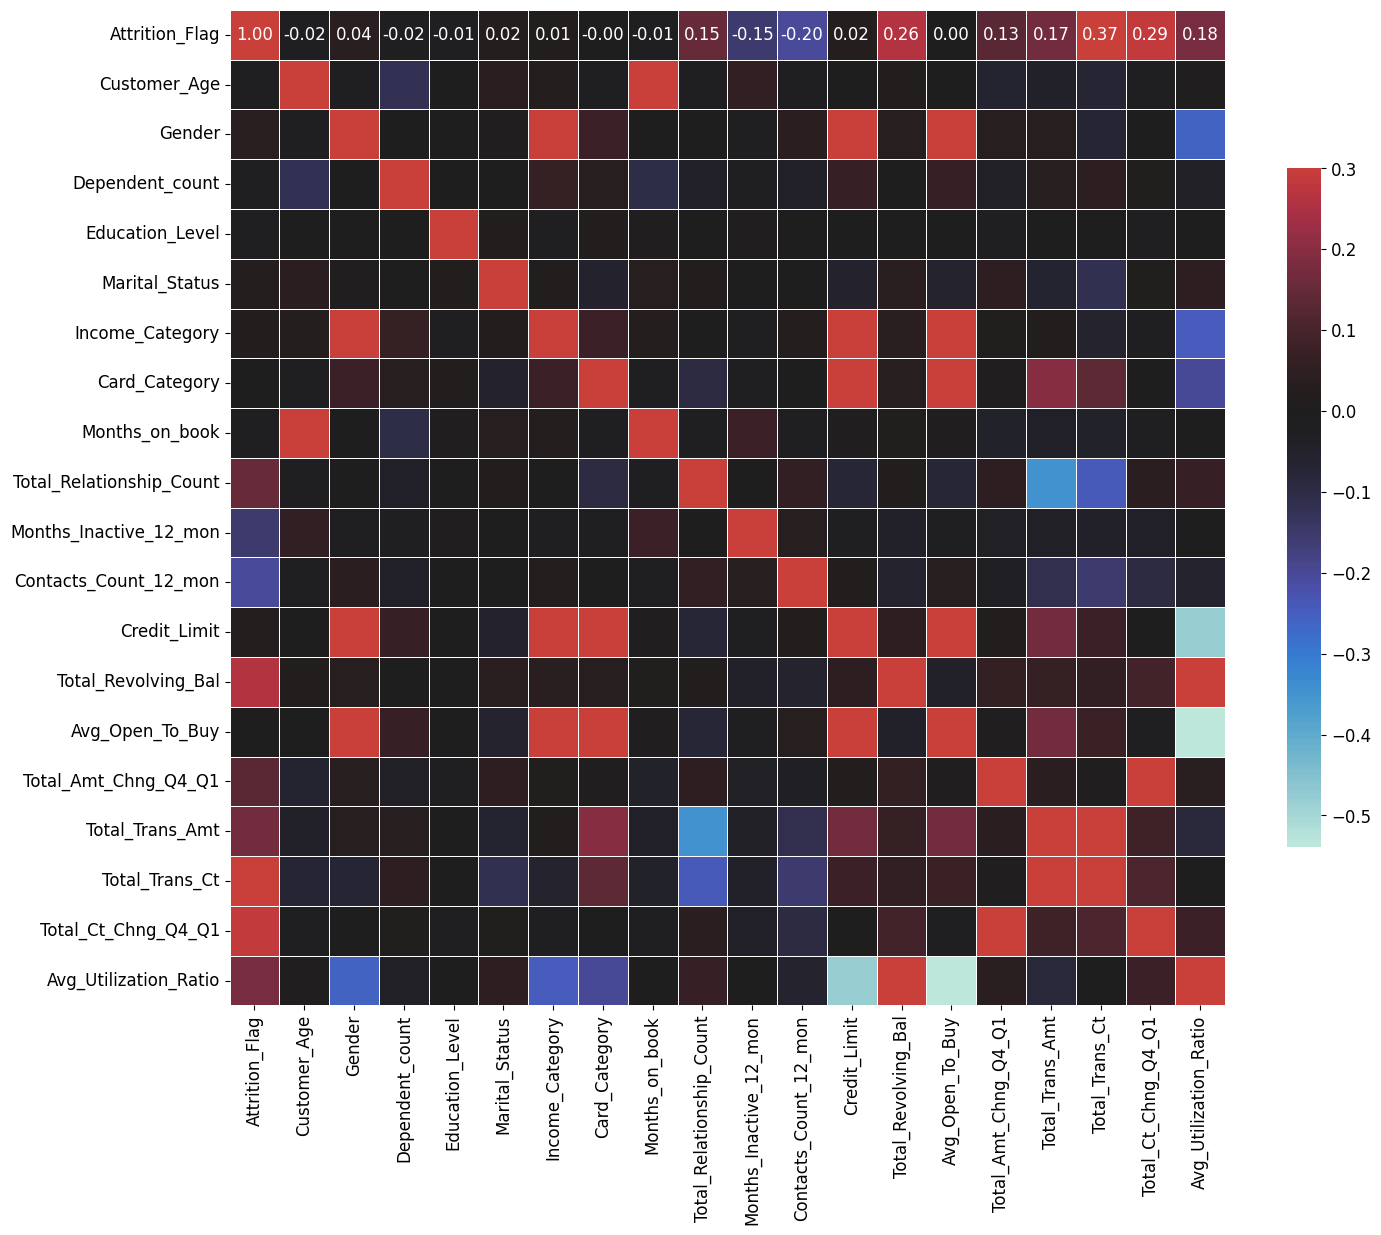

In [164]:
# 绘制热力图
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5},annot=True,fmt='.2f')
plt.tight_layout()
plt.show()

## 4 划分训练集和测试集

In [165]:
from sklearn.model_selection import train_test_split
# 将特征列赋值给X，将目标变量（流失与否）赋值给y
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']
# 使用分层抽样划分训练集和测试集，设置stratify参数为y，确保训练集和测试集中的流失和非流失客户的比例与整个数据集中的比例相似
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [166]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

8101 2026 8101 2026


In [167]:
file_path = f"BankChurners.csv"
data = pd.read_csv(file_path)
Attrition_Flag = list(set(list(data['Attrition_Flag'])))
num_attrited = len(data[data['Attrition_Flag'] == 'Attrited Customer'])
num_existing = len(data[data['Attrition_Flag'] == 'Existing Customer'])
print('用户流失数：{}'.format(num_attrited))
print('用户未流失数：{}'.format(num_existing))
print('未流失用户占比：{}'.format(num_existing / (num_attrited + num_existing)))

用户流失数：1627
用户未流失数：8500
未流失用户占比：0.8393403772094401


In [168]:
num_y_existing = len(y_train[y_train==1.0])
num_y_all = len(y_train)
print('训练集中用户未流失数：{}'.format(num_y_existing))
print('训练集中未流失用户占比：{}'.format(num_y_existing / num_y_all))

训练集中用户未流失数：6799
训练集中未流失用户占比：0.8392791013455129


## 5 模型训练

In [169]:
import itertools
def Confusion_Matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.title('Confusion Matrix of {}'.format(name))
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    plt.colorbar()
    threshold=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j]>threshold else "black",
                fontsize=25)
    plt.show()

In [231]:
from sklearn.metrics import roc_curve, auc
def draw_ROC( y_pred,lable):
    fpr,tpr,thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr)
    plt.plot([0,1], [0,1], ls="--", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size']=12
    plt.title('ROC curve of {}'.format(name))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)
    plt.text(0.2, 0.8, 'AUC = %0.5f' % auc(fpr, tpr))


### 5.1 逻辑回归

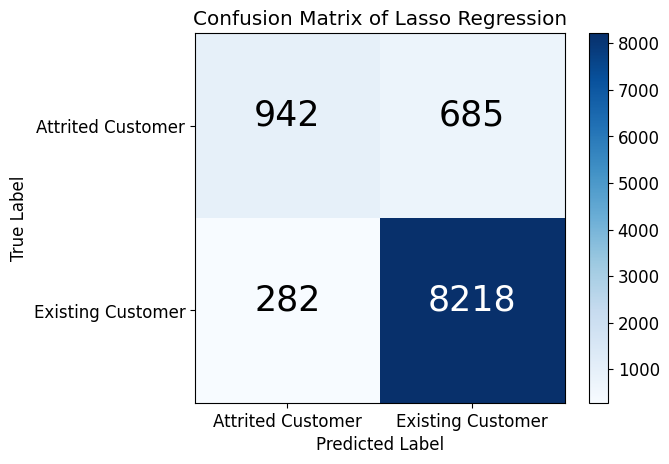

,Attrition_Flag,precision,recall,accuracy,F1-score
0,Attrited Customer,76.9608,57.8980,90.4513,0.660821
1,Existing Customer,92.3060,96.6824,90.4513,0.944435


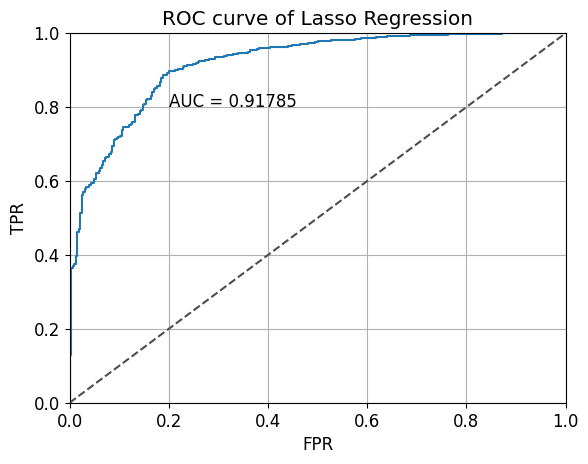

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
name = 'Lasso Regression'
logreg = LogisticRegression(random_state=0, C=1.0, penalty='l1', solver='liblinear') #L1正则（Lasso回归）
logreg.fit(X_train, y_train)
cm = np.array(confusion_matrix(y, logreg.predict(X)))

# 绘制混淆矩阵
Confusion_Matrix(cm, ['Attrited Customer', 'Existing Customer'])

# 绘制ROC曲线
y_pred1 = logreg.predict_proba(X_test)[:, 1]
draw_ROC(y_pred1,"Lasso Regression")
# 基本指标计算
FP = cm.sum(axis=0) - np.diag(cm)   #假正例
FN = cm.sum(axis=1) - np.diag(cm)   #假负例
TP = np.diag(cm)                    #真正例
TN = cm.sum() - (FP + FN + TP)      #真负例
Precision = np.round(100 * TP / (TP + FP), 4)  #精确率
Recall = np.round(100 * TP / (TP + FN), 4)  #召回率
Accuracy = np.round(100 * (TP + TN) / (TP + TN + FP + FN), 4) #准确率
F1 = np.round(2 * Precision * Recall / (Precision + Recall), 4)  #F1-score
data = {'Attrition_Flag': ['Attrited Customer', 'Existing Customer'],
        'precision': Precision,
        'recall': Recall,
        'accuracy': Accuracy,
        'F1-score': F1 / 100}
df = pd.DataFrame(data)
df


### 5.2 决策树

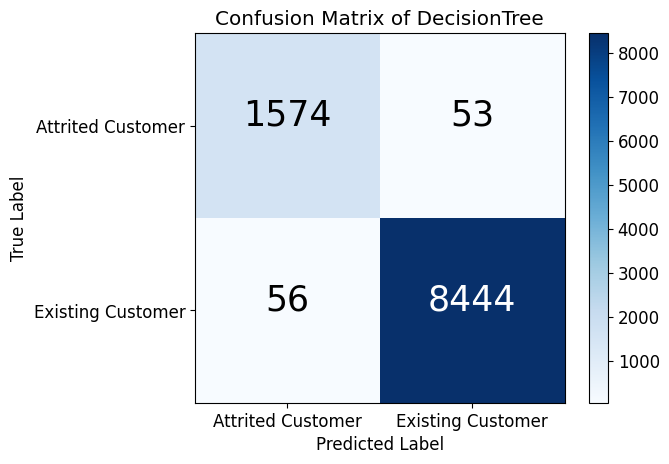

,Attrition_Flag,precision,recall,accuracy,F1-score
0,Attrited Customer,96.5644,96.7425,98.9237,0.966534
1,Existing Customer,99.3763,99.3412,98.9237,0.993587


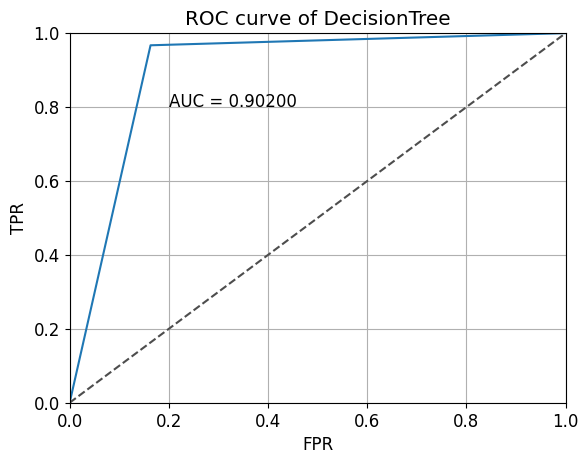

In [217]:
from sklearn.tree import DecisionTreeClassifier
name = 'DecisionTree'
DecisionTree = DecisionTreeClassifier(criterion='entropy',  random_state=0)
model = DecisionTree.fit(X_train, y_train)
cm = np.array(confusion_matrix(y, DecisionTree.predict(X)))
y_pred2 = DecisionTree.predict_proba(X_test)[:, 1]
# 绘制混淆矩阵
Confusion_Matrix(cm, ['Attrited Customer','Existing Customer'])

# 绘制ROC曲线
draw_ROC(y_pred2,"Decision Tree")
# 基本指标计算
FP = cm.sum(axis=0) - np.diag(cm)   #假正例
FN = cm.sum(axis=1) - np.diag(cm)   #假负例
TP = np.diag(cm)                    #真正例
TN = cm.sum() - (FP + FN + TP)      #真负例
Precision = np.round(100 * TP / (TP+FP), 4)  #精确率
Recall = np.round(100 * TP / (TP+FN), 4)  #召回率
Accuracy = np.round(100 * (TP+TN) / (TP+TN+FP+FN), 4) #准确率
F1 = (np.round(2 * Precision * Recall / (Precision + Recall), 4)) #F1-score
data = {'Attrition_Flag': ['Attrited Customer','Existing Customer'],
         'precision': Precision,
         'recall': Recall,
         'accuracy': Accuracy,
         'F1-score': F1/100}
df = pd.DataFrame(data)
df

### 5.3 随机森林

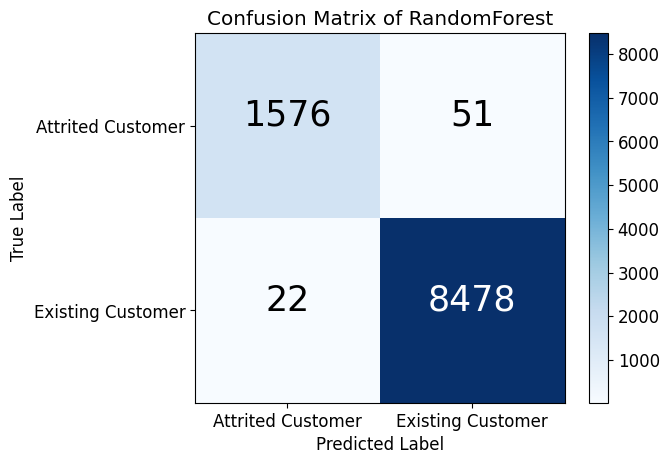

,Attrition_Flag,precision,recall,accuracy,F1-score
0,Attrited Customer,98.6233,96.8654,99.2792,0.977364
1,Existing Customer,99.4020,99.7412,99.2792,0.995713


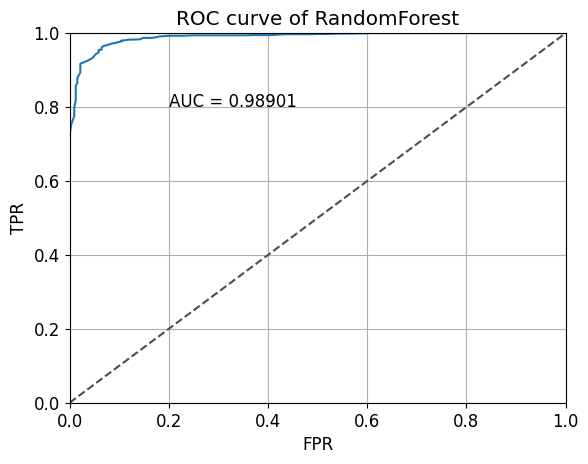

In [220]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
name = 'RandomForest'
rfc = RandomForestClassifier()
model = rfc.fit(X_train, y_train)
cm = np.array(confusion_matrix(y, rfc.predict(X)))
y_pred3 = rfc.predict_proba(X_test)[:, 1]
# 绘制混淆矩阵
Confusion_Matrix(cm, ['Attrited Customer','Existing Customer'])

# 绘制ROC曲线
draw_ROC(y_pred3,'Random Forest')
# 基本指标计算
FP = cm.sum(axis=0) - np.diag(cm)   #假正例
FN = cm.sum(axis=1) - np.diag(cm)   #假负例
TP = np.diag(cm)                    #真正例
TN = cm.sum() - (FP + FN + TP)      #真负例
Precision = np.round(100 * TP / (TP+FP), 4)  #精确率
Recall = np.round(100 * TP / (TP+FN), 4)  #召回率
Accuracy = np.round(100 * (TP+TN) / (TP+TN+FP+FN), 4) #准确率
F1 = (np.round(2 * Precision * Recall / (Precision + Recall), 4)) #F1-score
data = {'Attrition_Flag': ['Attrited Customer','Existing Customer'],
         'precision': Precision,
         'recall': Recall,
         'accuracy': Accuracy,
         'F1-score': F1/100}
df = pd.DataFrame(data)
df

### 5.4 SVC

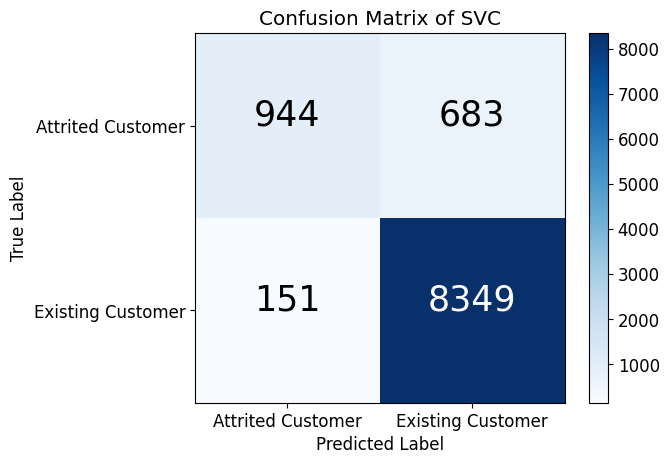

,Attrition_Flag,precision,recall,accuracy,F1-score
0,Attrited Customer,86.210,58.0209,91.7646,0.693608
1,Existing Customer,92.438,98.2235,91.7646,0.952430


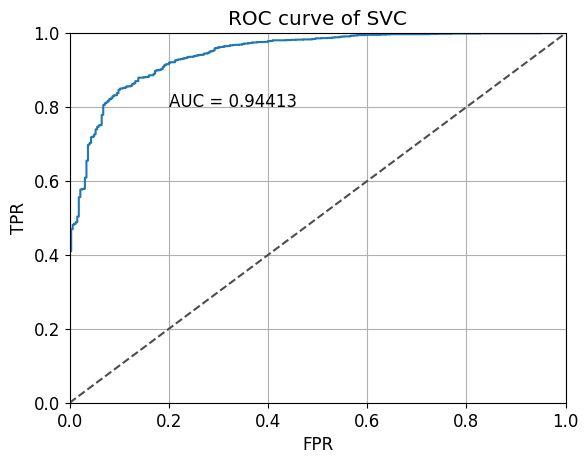

In [216]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
name = 'SVC'
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0, probability=True)
svm.fit(X_train, y_train)
cm = np.array(confusion_matrix(y, svm.predict(X)))
y_pred4 = svm.predict_proba(X_test)[:, 1]
# 绘制混淆矩阵
Confusion_Matrix(cm, ['Attrited Customer','Existing Customer'])

# 绘制ROC曲线
draw_ROC(y_pred4,'SVC')
# 基本指标计算
FP = cm.sum(axis=0) - np.diag(cm)   #假正例
FN = cm.sum(axis=1) - np.diag(cm)   #假负例
TP = np.diag(cm)                    #真正例
TN = cm.sum() - (FP + FN + TP)      #真负例
Precision = np.round(100 * TP / (TP+FP), 4)  #精确率
Recall = np.round(100 * TP / (TP+FN), 4)  #召回率
Accuracy = np.round(100 * (TP+TN) / (TP+TN+FP+FN), 4) #准确率
F1 = (np.round(2 * Precision * Recall / (Precision + Recall), 4)) #F1-score
data = {'Attrition_Flag': ['Attrited Customer','Existing Customer'],
         'precision': Precision,
         'recall': Recall,
         'accuracy': Accuracy,
         'F1-score': F1/100}
df = pd.DataFrame(data)
df

### 5.5 KNN

/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


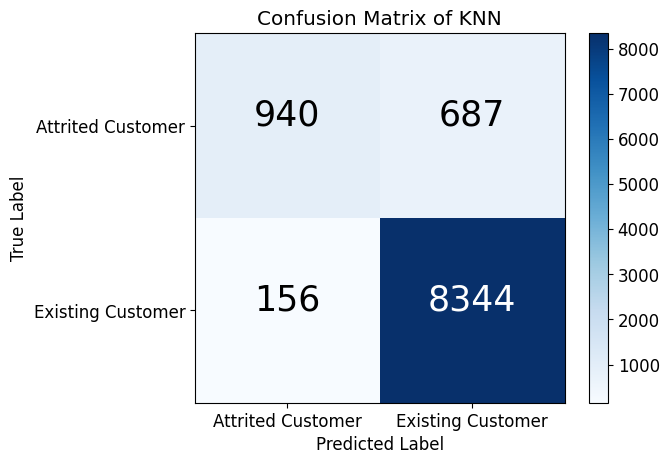

,Attrition_Flag,precision,recall,accuracy,F1-score
0,Attrited Customer,85.7664,57.7750,91.6757,0.690415
1,Existing Customer,92.3929,98.1647,91.6757,0.951914


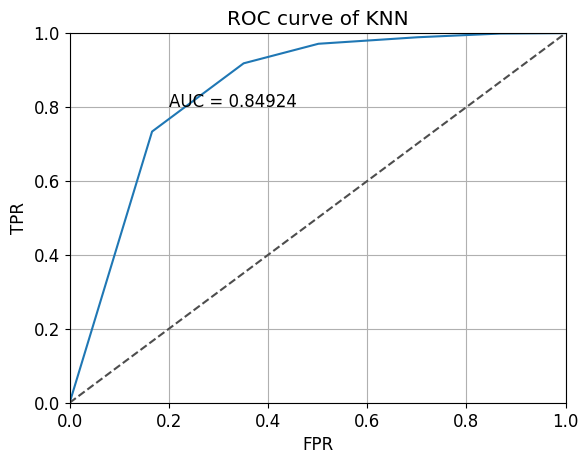

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
name = 'KNN'
X_contig = np.ascontiguousarray(X)
X_test_conting = np.ascontiguousarray(X_test)
KNN = KNeighborsClassifier(n_neighbors=5)
model = KNN.fit(X_train, y_train)
cm = confusion_matrix(y, KNN.predict(X_contig))
y_pred5 = KNN.predict_proba(X_test_contig)[:, 1]

# 绘制混淆矩阵
Confusion_Matrix(cm, ['Attrited Customer', 'Existing Customer'])

# 绘制ROC曲线
draw_ROC(y_pred5,'KNN')

# 基本指标计算
FP = cm.sum(axis=0) - np.diag(cm)   # 假正例
FN = cm.sum(axis=1) - np.diag(cm)   # 假负例
TP = np.diag(cm)                    # 真正例
TN = cm.sum() - (FP + FN + TP)      # 真负例
Precision = np.round(100 * TP / (TP + FP), 4)  # 精确率
Recall = np.round(100 * TP / (TP + FN), 4)  # 召回率
Accuracy = np.round(100 * (TP + TN) / (TP + TN + FP + FN), 4)  # 准确率
F1 = (np.round(2 * Precision * Recall / (Precision + Recall), 4))  # F1-score

data = {'Attrition_Flag': ['Attrited Customer', 'Existing Customer'],
        'precision': Precision,
        'recall': Recall,
        'accuracy': Accuracy,
        'F1-score': F1 / 100}
df = pd.DataFrame(data)
df


### 5.6 MLP

/Users/liucongjing/anaconda3/envs/torch1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


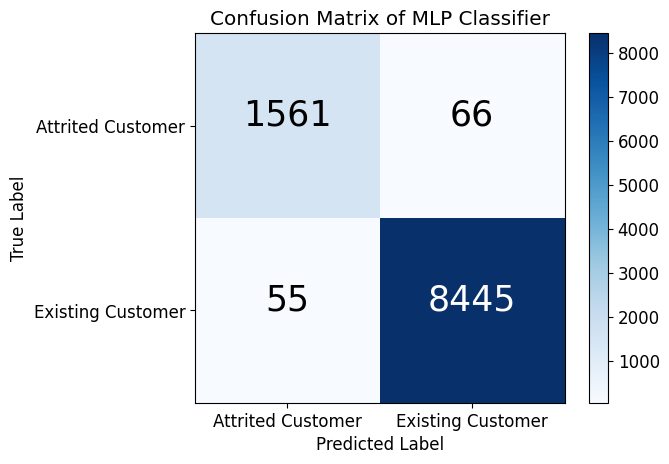

,Attrition_Flag,precision,recall,accuracy,F1-score
0,Attrited Customer,96.5965,95.9435,98.8052,0.962689
1,Existing Customer,99.2245,99.3529,98.8052,0.992887


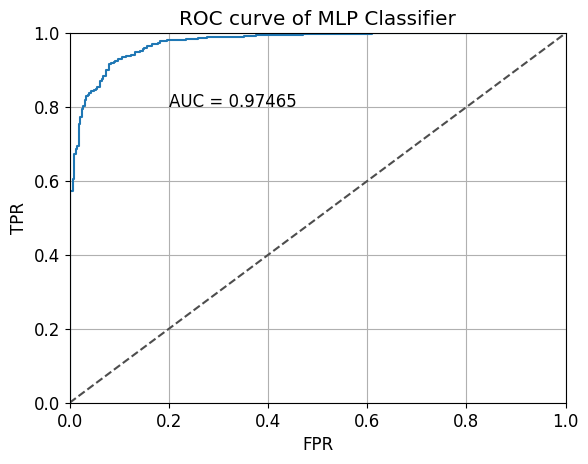

In [234]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# 创建并训练 MLP 模型
name = 'MLP Classifier'
mlp = MLPClassifier(hidden_layer_sizes=(256,256,128), alpha=0.0001,random_state=0, max_iter=100)
mlp.fit(X_train, y_train)
y_pred6 = mlp.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y, mlp.predict(X))

# 绘制混淆矩阵
Confusion_Matrix(cm, ['Attrited Customer', 'Existing Customer'])

# 绘制ROC曲线
draw_ROC(y_pred6,'MLP')

# 计算基本指标
FP = cm.sum(axis=0) - np.diag(cm)   # 假正例
FN = cm.sum(axis=1) - np.diag(cm)   # 假负例
TP = np.diag(cm)                    # 真正例
TN = cm.sum() - (FP + FN + TP)      # 真负例
Precision = np.round(100 * TP / (TP+FP), 4)  # 精确率
Recall = np.round(100 * TP / (TP+FN), 4)  # 召回率
Accuracy = np.round(100 * (TP+TN) / (TP+TN+FP+FN), 4)  # 准确率
F1 = np.round(2 * Precision * Recall / (Precision + Recall), 4)  # F1-score

# 创建DataFrame
data = {'Attrition_Flag': ['Attrited Customer', 'Existing Customer'],
        'precision': Precision,
        'recall': Recall,
        'accuracy': Accuracy,
        'F1-score': F1/100}
df = pd.DataFrame(data)
df


## 6 实验结果分析

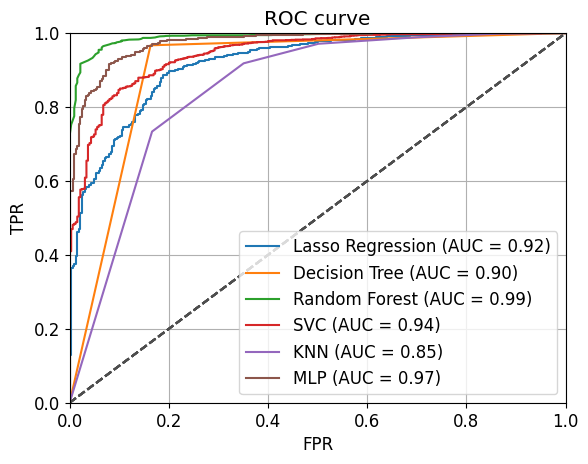

In [228]:
def draw_ROC_all(y_test, y_pred, label):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], ls="--", c=".3")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)
    plt.legend(loc='lower right')


draw_ROC_all(y_test, y_pred1, 'Lasso Regression')
draw_ROC_all(y_test, y_pred2, 'Decision Tree')
draw_ROC_all(y_test, y_pred3, 'Random Forest')
draw_ROC_all(y_test, y_pred4, 'SVC')
draw_ROC_all(y_test, y_pred5, 'KNN')
draw_ROC_all(y_test, y_pred6, 'MLP')

plt.show()
